In [52]:
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer as Imputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn import preprocessing
import scikitplot as skplt
import warnings

In [54]:
binarized_df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons/cleaned_unhcrdf_final.csv')
binarized_df.head()

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [55]:
binarized_df.drop(columns = ['Unnamed: 0'], inplace=True)

In [58]:
y = binarized_df.pop('accommodation_type')
X = pd.get_dummies(binarized_df, drop_first=True)

In [59]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.7486373556474343


In [60]:
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

In [61]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)

In [62]:
y
#'0 'if it is 'I 'and '1' if it is 'other'. 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [63]:
y = y.ravel()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [65]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
nnc = MLPClassifier(solver='lbfgs',
                    alpha=10**(-10),
                    hidden_layer_sizes=1,
                    activation='identity',
                    random_state=1,
                    batch_size='auto')

nnc.fit(X_train, y_train)

0.9164884575313922


In [69]:
print('Accuracy score - train: ', nnc.score(X_train, y_train))
print('Accuracy score - test: ', nnc.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(nnc, X_train, y_train, cv=5).mean())

Accuracy score - train:  0.9149644942834425
Accuracy score - test:  0.9164884575313922
Mean CV score - train:  0.9138403825241126


In [70]:
nnc_blank = MLPClassifier()

In [71]:
params = {'solver':['lbfgs', 'adam', 'sgd'],
                    'hidden_layer_sizes':(range(1, 3)),
                    'activation':['identity', 'relu', 'logistic', 'tanh']}

In [72]:
nnc_gs = GridSearchCV(estimator=nnc_blank, param_grid=params, cv=5)

In [73]:
nnc_gs.fit(X_train, y_train)

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/s

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': range(1, 3),
                         'solver': ['lbfgs', 'adam', 'sgd']})

In [75]:
nnc_gs.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': 2, 'solver': 'lbfgs'}

In [76]:
nnc_gs.best_score_

0.9173772337604393

In [77]:
nnc_best = MLPClassifier(activation = 'logistic', hidden_layer_sizes = 2, solver ='lbfgs')

In [78]:
nnc_best.fit(X_train, y_train)

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=2, solver='lbfgs')

In [79]:
print('Accuracy score - train: ', nnc_best.score(X_train, y_train))
print('Accuracy score - test: ', nnc_best.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(nnc_best, X_train, y_train, cv=5).mean())

Accuracy score - train:  0.9186932799605187
Accuracy score - test:  0.9183527992542633


/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

Mean CV score - train:  0.9193238739638355


/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


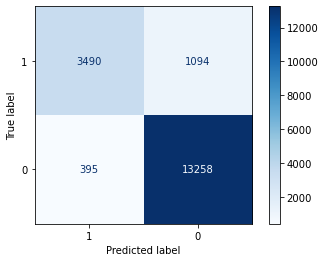

In [84]:
plot_confusion_matrix(nnc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.show()

In [86]:
y_test_pred = nnc_best.predict(X_test)

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13653
           1       0.90      0.76      0.82      4584

    accuracy                           0.92     18237
   macro avg       0.91      0.87      0.89     18237
weighted avg       0.92      0.92      0.92     18237



In [89]:
probabilities_train = nnc_best.predict_proba(X_train)

In [91]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(nnc_best.classes_)))

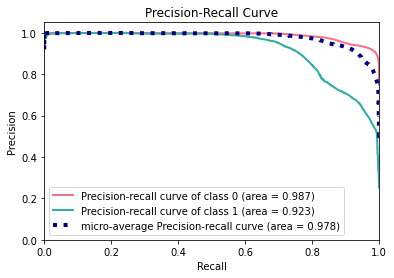

In [92]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

In [93]:
print('Average precision score: ', average_precision_score(y_train, probabilities_train[:, 1]))

Average precision score:  0.9228647087133524


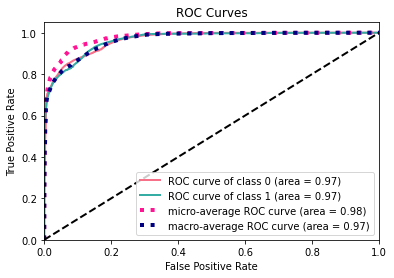

In [94]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

In [95]:
print('Area under the curve : ', roc_auc_score(y_train, probabilities_train[:, 1]))

Area under the curve :  0.9659121888375225
